In [ ]:
#L1 
#Credit https://github.com/losc-tutorial/quickview

In [ ]:
#GW170823 

Downloading:  https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW170823/v1/L-L1_GWOSC_4KHZ_R1-1187527209-4096.hdf5


C:\Users\bhatb\anaconda3\envs\gwave\lib\site-packages\gwpy\plot\plot.py:279: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


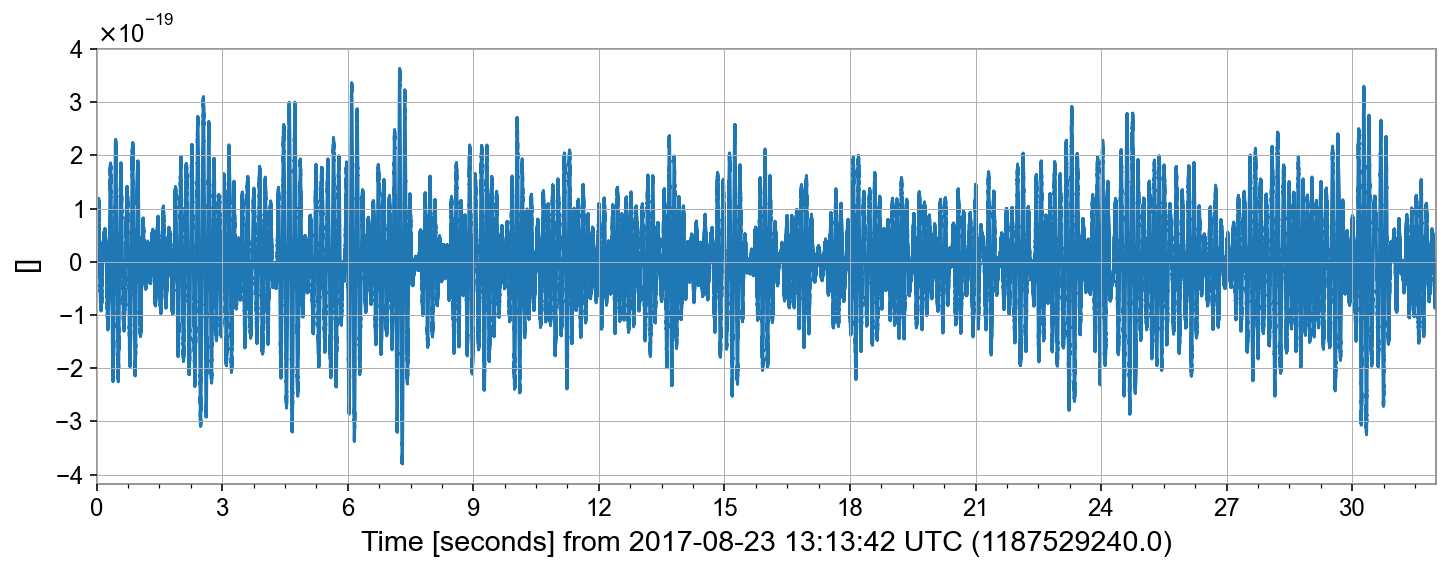

In [ ]:
import requests, os
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

try:
    from gwpy.timeseries import TimeSeries
except:
    ! pip install -q gwpy
    from gwpy.timeseries import TimeSeries   
t0 = 1187529256.5 
detector = 'L1'

from gwosc.locate import get_urls
url = get_urls(detector, t0, t0)[-1]

print('Downloading: ' , url)
fn = os.path.basename(url)
with open(fn,'wb') as strainfile:                 
    straindata = requests.get(url)
    strainfile.write(straindata.content)
strain = TimeSeries.read(fn,format='hdf5.losc')
center = int(t0)
strain = strain.crop(center-16, center+16)
fig1 = strain.plot()
fig1.show()

(1e-24, 1e-19)

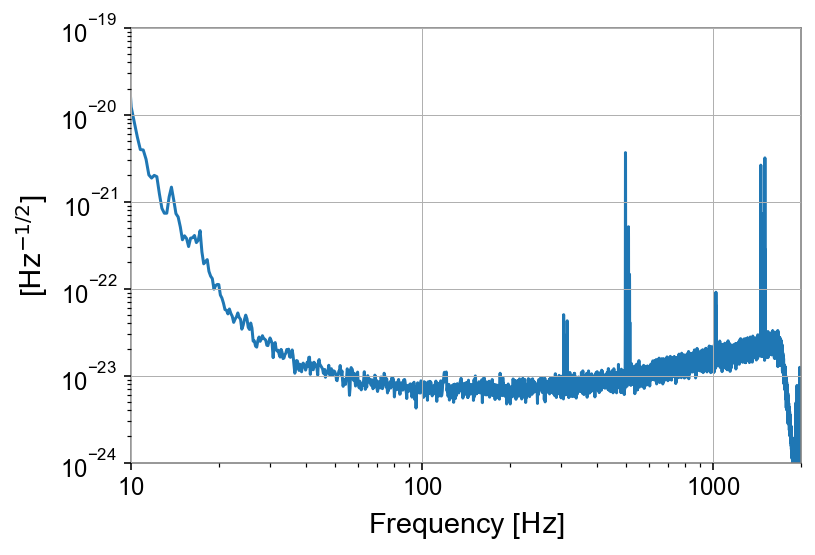

In [ ]:
fig2 = strain.asd(fftlength=4).plot()
plt.xlim(10,2000)
plt.ylim(1e-24, 1e-19)

(1187529256.3, 1187529256.6)

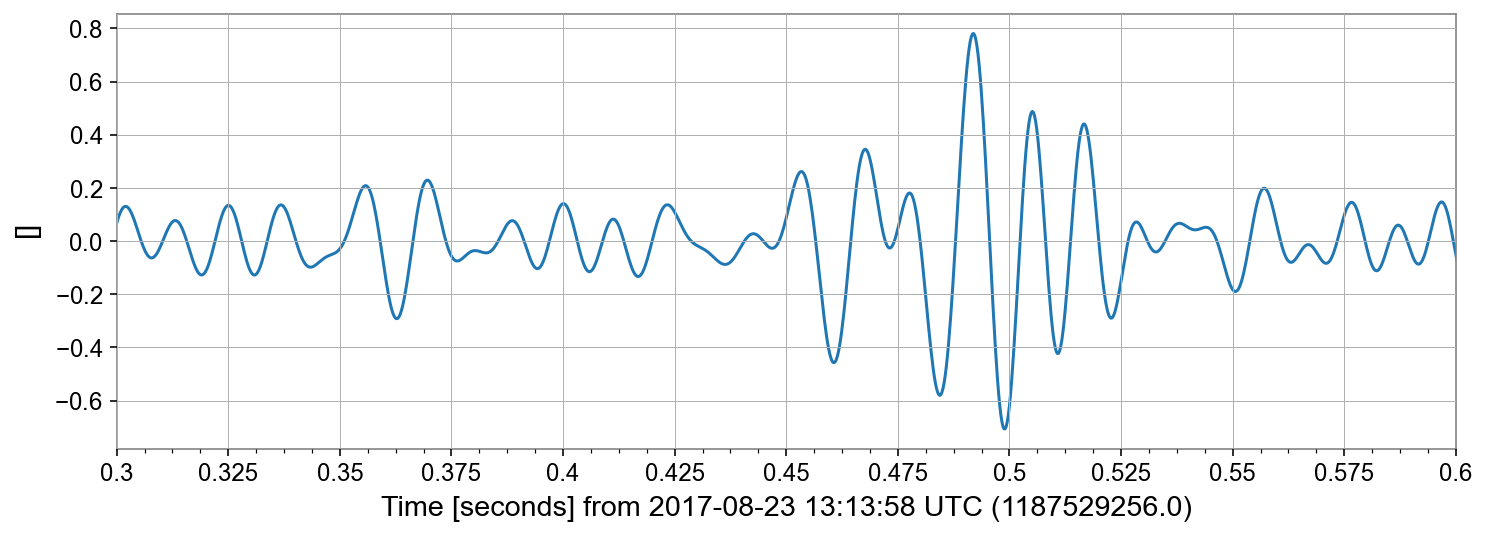

In [ ]:
white_data = strain.whiten()
bp_data = white_data.bandpass(40, 100)
fig3 = bp_data.plot()
plt.xlim(t0-0.2, t0+0.1)

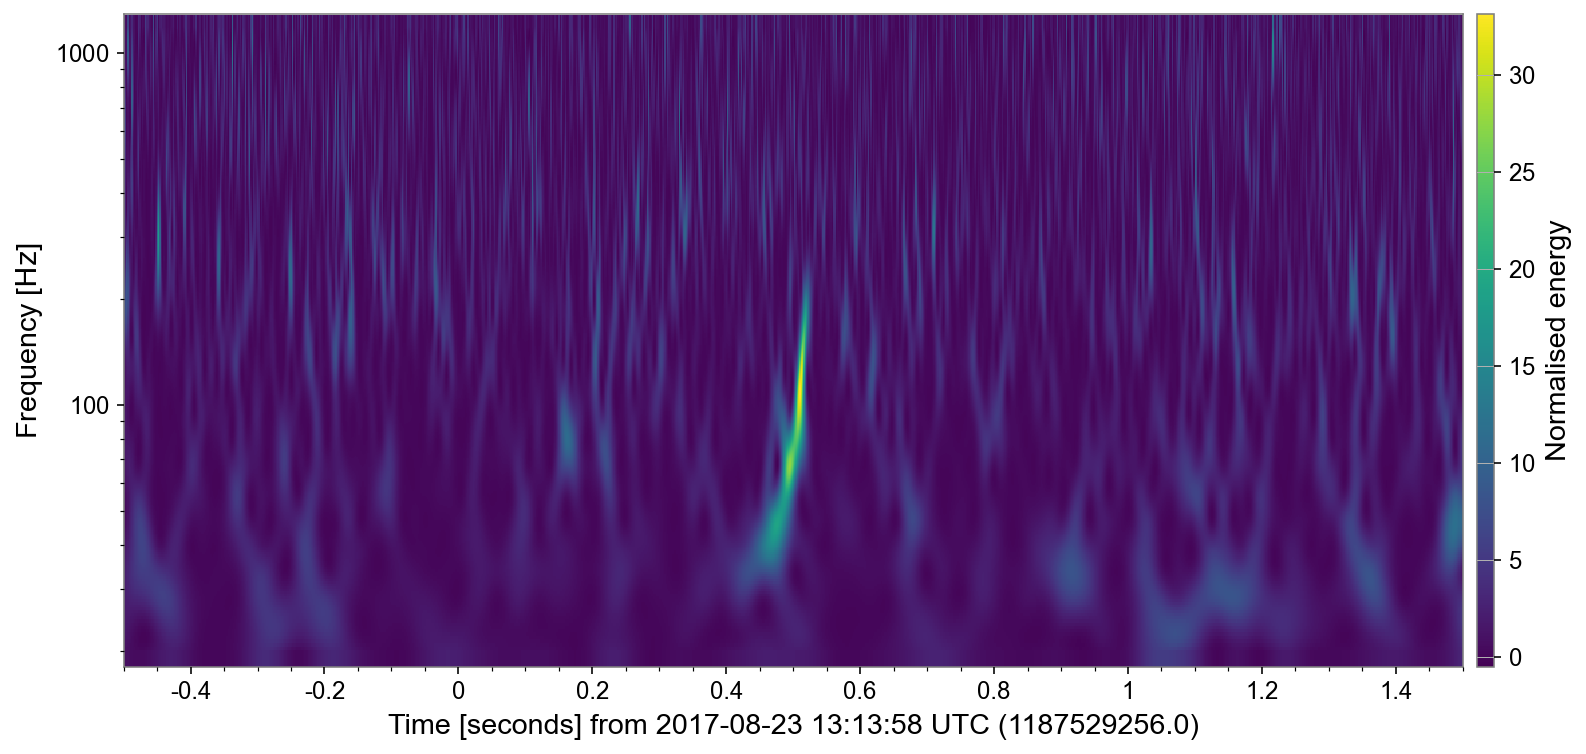

In [ ]:
dt = 1  #-- Set width of q-transform plot, in seconds
hq = strain.q_transform(outseg=(t0-dt, t0+dt))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalised energy")
ax.grid(False)
ax.set_yscale('log')